<a id='top'></a>
#  <center> *Community Detection: CDlib*

![](https://user-images.githubusercontent.com/5682381/28490289-d2e92b58-6ed6-11e7-8b9e-769f74524023.gif)


Realisé par :    
- ASRI Mohamed Amin 
- BOUBKER Ayoub
- CHBAB Khalid
- DRIOUCHE Adnane
- OUHMAID Khalid
 

``CDlib`` est une bibliothèque python conçue pour fournir un support à l'extraction et à l'analyse des regroupements de réseaux.

Dans ce notebook, nous allons présenter certaines des principales caractéristiques de la bibliothèque et un aperçu de ses fonctionnalités.


## Sommaire

1. [Installation de CDlib](#install)
2. [Community Discovery Workflow](#workflow)
    1. [Création des graphes](#graph)
    2. [Algorithme(s) du Community Discovery: choix et configuration ](#model)
    3. [Évaluation du Clustering (Fitness functions)](#fitness)
    4. [Évaluation du Clustering (Comparaison)](#comparison)
    5. [Visualisation du Communauté/Statistiques](#visualization)
3. [Installations avancées: Pooling et Optimization](#advanced) 
    1. [Pooling](#pooling)
    2. [Optimization](#optimization)
4. [Conclusions](#conclusion)

<a id='install'></a>

## 1. Installation de CDlib [🔼](#top)

Dans un premier temps, nous devons nous assurer que ``CDlib`` est installé et fonctionne. 

La bibliothèque est disponible pour python>=3.8, et sa version stable peut être installée en utilisant ``pip``:

In [ ]:
pip install cdlib

nous avons aussi installer ``networkx``.

In [ ]:
pip install networkx

<a id='workflow'></a>
## 2. Community Discovery Workflow [🔼](#top)

``CDlib`` permet d'extraire, d'analyser et de comparer les regroupements de réseaux en appliquant plusieurs approches. Workflow peut être résumé comme suit :
- Création des graphes
- Community Discovery algorithm(s) selection and configuration
- Évaluation du Clustering (Fitness functions)
- Évaluation du Clustering (Comparaison)
- Visualisation du Communauté/Statistiques

Dans cette section, nous allons observer comment modéliser un workflow en appliquant deux algorithmes classiques de regroupement de réseaux : Label Propagation et Leiden.

<a id="graph"></a>
### 2.A Création des graphes [🔼](#top)

Dans un premier temps, nous devons définir la topologie du réseau qui sera utilisée comme terrain de jeu pour étudier les phénomènes diffusifs.

``CDlib`` supporte [``networkx``](https://networkx.github.io) et [``igraph``](https://igraph.org/python/) les structures de données.

Dans nos exemples, pour des raisons de simplicité, nous utiliserons ``networkx`` pour des graphes non orientés . 

In [61]:
from cdlib import algorithms
import networkx as nx
import cdlib

<a id="model"></a>
### 2.B Algorithme(s) du Community Discovery: choix et configuration [🔼](#top)

Après avoir défini le graphe, nous pouvons sélectionner le ou les algorithmes pour le partitionner.

In [65]:
g = nx.karate_club_graph()
lp_coms = algorithms.label_propagation(g)
leiden_coms = algorithms.leiden(g)

Tous les algorithmes de découverte de communauté génèrent comme résultat un objet qui implémente une instance concrète du type de données ``Clustering``.

En particulier, Louvain et Label Propagation renvoient tous deux un objet ``NodeClustering`` ayant les propriétés suivantes :

In [32]:
# Nom de l'algorithme de clustering
leiden_coms.method_name 

'Leiden'

In [33]:
# Paramètres du Clustering 
leiden_coms.method_parameters 

{'initial_membership': None, 'weights': None}

In [34]:
# Identification du Clusering
leiden_coms.communities 

[[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [23, 24, 25, 27, 28, 31],
 [4, 5, 6, 10, 16]]

In [35]:
leiden_coms.overlap 

False

In [36]:
# Pourcentage de nœuds couverts par le clustering
leiden_coms.node_coverage 

1.0

De plus, les objets de ``Clustering`` permettent également de générer une représentation JSON des résultats.

In [37]:
leiden_coms.to_json()

'{"communities": [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]], "algorithm": "Leiden", "params": {"initial_membership": null, "weights": null}, "overlap": false, "coverage": 1.0}'

<a id="fitness"></a>
### 2.C Évaluation du Clustering (Fitness functions) ([to top](#top))

Après avoir obtenu un clustering de réseau, nous pouvons calculer plusieurs index sur celui-ci. 

Pour un même indice, il est possible d'obtenir une représentation synthétique de ses valeurs min/max/moyenne/std.

In [38]:
leiden_coms.average_internal_degree()

FitnessResult(min=2.3333333333333335, max=4.181818181818182, score=3.103787878787879, std=0.7758948002447444)

In [39]:
leiden_coms.average_internal_degree(summary=False)

[3.5, 4.181818181818182, 2.3333333333333335, 2.4]

Les scores de Fitness peuvent également être instanciés au niveau de la Library.

In [40]:
from cdlib import evaluation

evaluation.average_internal_degree(g, leiden_coms)

FitnessResult(min=2.3333333333333335, max=4.181818181818182, score=3.103787878787879, std=0.7758948002447444)

<a id="comparison"></a>
### 2.D Évaluation du Clustering (Comparaison) ([to top](#top))

Lorsque plusieurs clusters ont été calculés sur un même réseau, il est utile de mesurer leur ressemblance.

``CDlib`` permet de le faire en exposant plusieurs scores de ressemblance de clustering, chacun d'entre eux étant adapté pour supporter un type spécifique de clustering de réseau (crisp/partition, couverture complète/partielle des nœuds).

Comme pour les fonctions de fitness, les scores de ressemblance peuvent être instanciés au niveau de la communauté et de la Library aussi.

In [41]:
leiden_coms.normalized_mutual_information(lp_coms)

MatchingResult(score=0.5421597004371672, std=None)

In [42]:
evaluation.normalized_mutual_information(leiden_coms, lp_coms)

MatchingResult(score=0.5421597004371672, std=None)

<a id="visualization"></a>
### 2.E Visualisation du Communauté/Statistiques ([to top](#top))

``CDlib`` permet de générer deux familles de tracés prédéfinis :
- Visualisations de réseaux/communautés
- Visualisations de Fitness/comparaison des communautés

#### 2.E.1 Visualisation des graphes

Une façon de visualiser les communautés identifiées sur un graphe est de colorer les nœuds du graphe en conséquence.

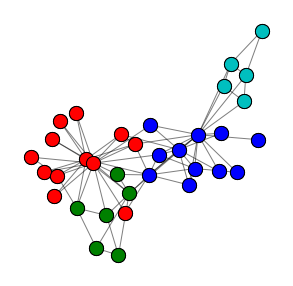

In [43]:
from cdlib import viz

pos = nx.spring_layout(g)
viz.plot_network_clusters(g, leiden_coms, pos, figsize=(5, 5))

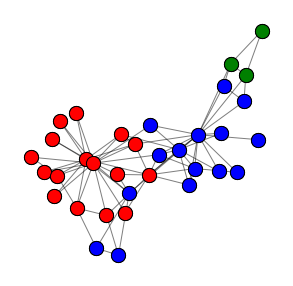

In [44]:
viz.plot_network_clusters(g, lp_coms, pos, figsize=(5, 5))

Cette stratégie est réalisable lorsque le réseau est suffisamment petit. Dans le cas de graphes de taille moyenne, une alternative consiste à regrouper tous les nœuds de communauté en un seul méta-nœud et à visualiser le graphe de communauté résultant :

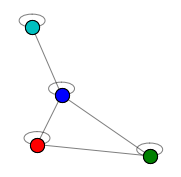

In [45]:
viz.plot_community_graph(g, leiden_coms, figsize=(3, 3))

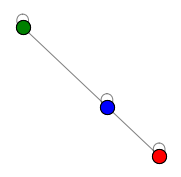

In [46]:
viz.plot_community_graph(g, lp_coms, figsize=(3, 3))

#### 2.E.2 Visualisations de Fitness/comparaison des communautés

Etant donné un (ou de plusieurs) regroupement(s), il peut être utile de visualiser comment une fonction de fitness donnée se répartit sur les communautés.

Pour ca on utilise les diagrammes de violon.

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

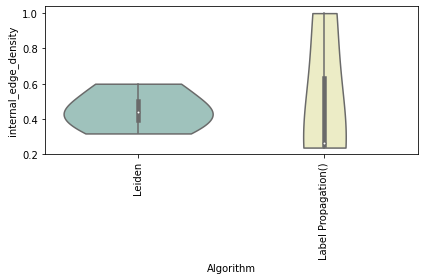

In [47]:
viz.plot_com_stat([leiden_coms, lp_coms], evaluation.internal_edge_density)

Un autre type de visualisation simple qui permet d'obtenir quelques aperçus des caractéristiques de la communauté est le diagramme de dispersion.

Nous pouvons facilement comparer par paire les fonctions de fitness pour un ou plusieurs clusters comme suit :

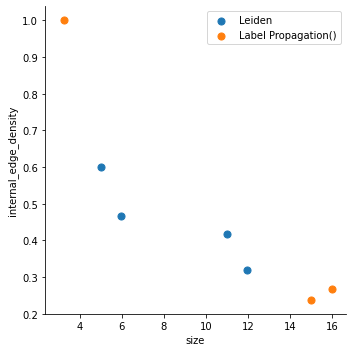

In [48]:
viz.plot_com_properties_relation([leiden_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)

Supposons que nous voulions comparer différents regroupements sur un ensemble de partitions de vérité de base du réseau.

Afin d'obtenir un exemple plus intéressant, nous pouvons générer quelques graphes synthétiques avec des regroupements de vérité terrain plantés et effectuer le CD sur ceux-ci. <br/> Nous pouvons facilement comparer visuellement leurs résultats comme suit :

<AxesSubplot:xlabel='graph', ylabel='score'>

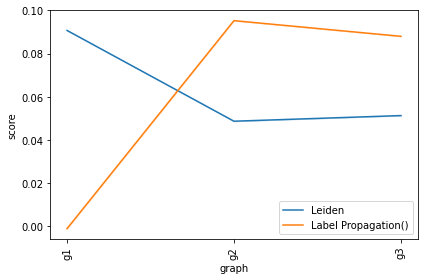

In [49]:
from cdlib import NodeClustering

g1 = nx.generators.community.LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = nx.generators.community.LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = nx.generators.community.LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<a id='advanced'></a>
## 3. Installations avancées: Pooling et Optimization ([to top](#top))

``CDlib`` offre quelques fonctionnalités pour automatiser l'exécution de plusieurs approches CD sur un même graph.


Les fonctionnalités offertes peuvent être globalement regroupées en deux sous-classes:
- Pooling, et
- Optimization



<a id='pooling'></a>
### 3.A Pooling

Pooling permet d'empiler l'exécution de plusieurs algorithmes


In [53]:
from cdlib import ensemble

# Louvain configuration
methods = [algorithms.louvain, algorithms.leiden]

for coms in ensemble.pool(g, methods, configurations=[[], []]):
    print(coms.method_name, "\n", coms.communities)

Louvain 
 [[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]]
Leiden 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]]


Le paramètre  ``configuration`` permet de définir une liste de paramètres pour chaque algorithme. <br/>
Chaque liste ne doit contenir que des instances de ``Parameter`` ou ``BoolParameter`` tuples nommés.


In [54]:
# Exemple de configuration de Louvain
resolution = ensemble.Parameter(name="resolution", start=0.1)
randomize = ensemble.BoolParameter(name="randomize", value=True)
louvain_conf = [resolution, randomize]

methods = [algorithms.louvain, algorithms.leiden]

for communities in ensemble.pool(g, methods, [louvain_conf, []]):
    print(coms.method_name, "\n", coms.communities)

Leiden 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]]
Leiden 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]]


``Parameter`` et ``Bool Parameter`` permettent de définir également des plages de grille, par exemple :

In [55]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1) # numeric range
randomize = ensemble.BoolParameter(name="randomize") # boolean range [True, False]

Une telle généralisation permet leur utilisation dans une autre fonction de Pooling : Grid Execution.

Grid Execution prend soin d'instancier un algorithme CD avec toutes les combinaisons possibles de valeurs de paramètres (produit cartésien) telles qu'exprimées par les plages passées en entrée.

In [56]:
resolution = ensemble.Parameter(name="resolution", start=0.7, end=1, step=0.1)

for coms in ensemble.grid_execution(graph=g, method=algorithms.louvain, parameters=[resolution]):
    print(coms.method_name, coms.method_parameters, "\n", coms.communities, "\n")

Louvain {'weight': 'weight', 'resolution': 0.7, 'randomize': None} 
 [[8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [2, 9]] 

Louvain {'weight': 'weight', 'resolution': 0.7999999999999999, 'randomize': None} 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]] 

Louvain {'weight': 'weight', 'resolution': 0.8999999999999999, 'randomize': None} 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]] 

Louvain {'weight': 'weight', 'resolution': 0.9999999999999999, 'randomize': None} 
 [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]] 



<a id='optimization'></a>
### 3.A Optimization

Il est souvent judicieux d'exécuter plusieurs fois un algorithme de CD donné, en faisant varier ses paramètres w,r,t , afin d'identifier la configuration optimale par rapport à. un score de condition physique donné.

La façon la plus simple de le faire est d'effectuer une recherche par grille :

In [70]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize")

coms, scoring = ensemble.grid_search(graph=g, method=algorithms.louvain,
                                                     parameters=[resolution, randomize],
                                                     quality_score=evaluation.erdos_renyi_modularity,
                                                     aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

Communities:
 [[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]] 
Configuration: {'weight': 'weight', 'resolution': 0.8, 'randomize': False} 
Scoring: FitnessResult(min=None, max=None, score=0.4712052653229123, std=None)


La recherche de grille exécutera **toute** la configuration possible telle qu'exprimée par les paramètres de la méthode et ne renverra que la partition optimale w.r.t. la fonction de fitness spécifiée (modularité ER dans notre exemple) et la fonction d'agrégation (nous voulons maximiser le score de fitness).

En effet, une telle stratégie pourrait être coûteuse. <br/>
Pour cette raison, ``CDlib`` implémente également une stratégie d'optimisation de la recherche aléatoire qui réduit le nombre d'instanciations de méthodes sur les grilles de configuration (en le contrôlant via la valeur du paramètre ``instance``).

In [71]:
communities, scoring = ensemble.random_search(graph=g, method=algorithms.louvain,
                                                       parameters=[resolution, randomize],
                                                       quality_score=evaluation.erdos_renyi_modularity,
                                                       instances=5, aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

Communities:
 [[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]] 
Configuration: {'weight': 'weight', 'resolution': 0.8, 'randomize': False} 
Scoring: FitnessResult(min=None, max=None, score=0.4584533113944878, std=None)


Enfin, on peut penser à combiner pooling et optimisation pour n'obtenir que les résultats optimaux pour tous les algorithmes que l'on souhaite appliquer à notre graphe.

Dans ``CDlib`` nous pouvons le faire facilement comme suit :

In [72]:
louvain_conf = [resolution, randomize]

epsilon = ensemble.Parameter(name="epsilon", start=0.2, end=0.7, step=0.1)
demon_conf = [epsilon]

methods = [algorithms.louvain, algorithms.demon]

for coms, scoring in ensemble.pool_grid_filter(g, methods, [louvain_conf, demon_conf], quality_score=evaluation.erdos_renyi_modularity, aggregate=max):
    print("%s\nCommunities:\n %s \nConfiguration: %s \nScoring: %s\n" %(coms.method_name, coms.communities, coms.method_parameters, scoring))

Louvain
Communities:
 [[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]] 
Configuration: {'weight': 'weight', 'resolution': 0.8, 'randomize': False} 
Scoring: FitnessResult(min=None, max=None, score=0.4712052653229123, std=None)

DEMON
Communities:
 [[2, 8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 31, 32, 33], [8, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 7, 8, 12, 13, 17, 19, 21, 30, 32, 33], [0, 4, 5, 6, 10, 16]] 
Configuration: {'epsilon': 0.5000000000000001, 'min_com_size': 3} 
Scoring: FitnessResult(min=None, max=None, score=0.757232963115316, std=None)



<a id="conclusion"></a>
## 4. Conclusions ([to top](#top))

Dans ce notebook, nous avons présenté les fonctionnalités de base offertes par ``CDlib``.

